&nbsp;

# 1. Basic Exploration
Data exploration is a crucial step into understanding the underlying patterns and relationships inside your dataset. The most effective way to improving your output is not by tuning hyperparameters or trying out more complex models, it is in fact improving the quality of your data. The way we do this is by checking if there is any missing data or identify any values outside the norm (outliers).  

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Importing .py files. 
import functions
import plot_functions

# Converts plotly output into static images, so it can be viewed inside github repository. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() # Setting root directory as cwd. 
df = pd.read_csv(r"{}\train.csv".format(root))
df.set_index("PassengerId", inplace=True) # Setting "PassengerId" as index. 
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


&nbsp;

### Section A: Exploratory Data Analysis 
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

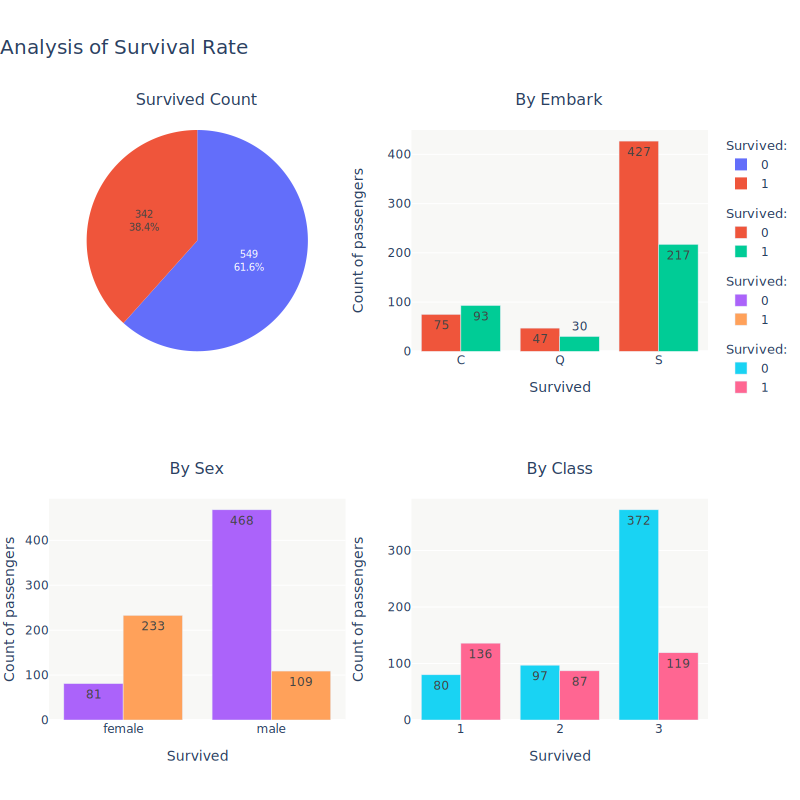

In [3]:
plot_functions.label_dashboard(df=df)

* Straight away we can see we have an imbalanced dataset, with 549 passengers who lost their lives and 342 who survived. 
* Southampton (S) had both the highest deaths and survivors between the other 2 locations.
* Females had a 74% survival rate, while males only had a 19% survival rate. 
* Most of the deaths occured in 3rd class, while the majority that survived occured in 1st class. 

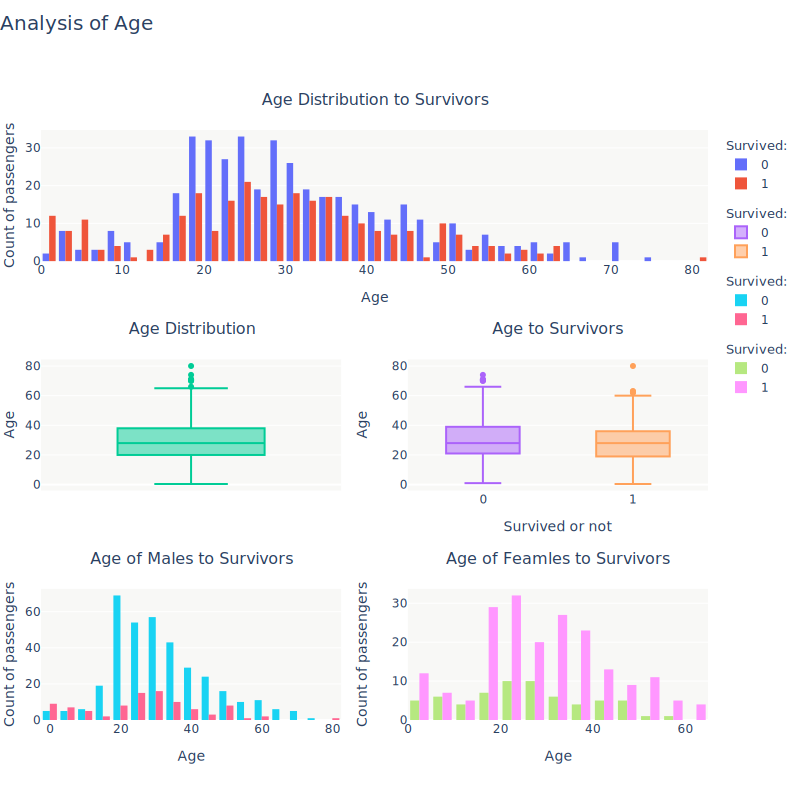

In [4]:
plot_functions.numerical_gender(column="Age", y_title= "Age", df=df)

* The age distribution for passengers who didn't survive follow a symmetrical distribution which is emulated by those who did survive, with a higher concerntration of points leading at the >10 age mark. This makes sense, because the first callout to the life boats were women and children first.
* The few outliers we see in the dataset are those indviduals who are aged 65 years and over, with the highest outlier being 80, this seems highly possible, so sample error will be ruled out. 
* For males who did not survived we have a left skewed distribution with the majoirty of deaths occuring between the ages of 20-40. We can come to the same conclusion for male survivors, with a higher concerntration of points to the left side.
* Finally, for the female distribution for both survivors and non-survivors there is a normal distribution.

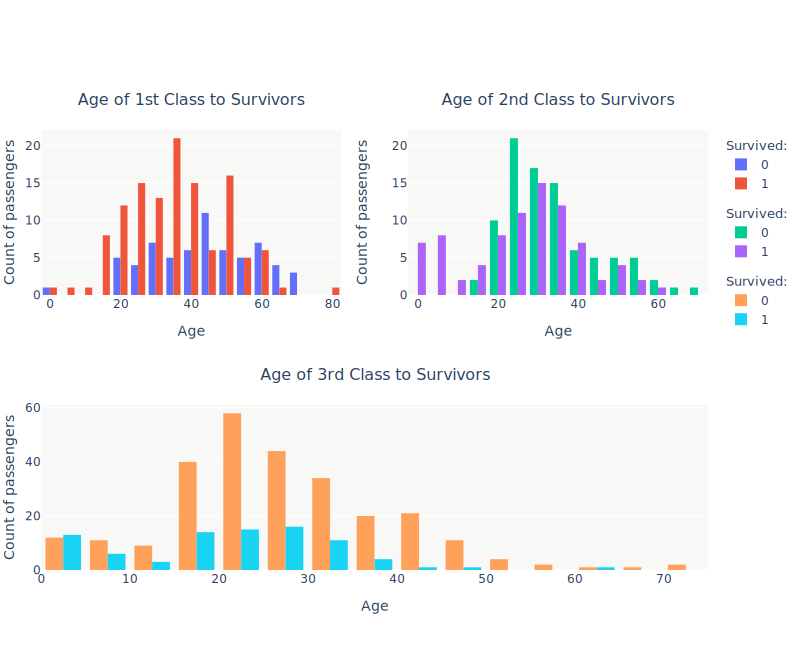

In [5]:
plot_functions.numerical_classes(column="Age", y_title= "Age", df=df)

* Immediately we can see that first class passengers had the highest survival rate amongst all classes, with a normal distribution.
* Interestingly for the 2nd class, therer seems to be an almost leveled survival rate, with the majority of deaths occuring at mid 20's. However, the 2nd class has the highest survival rate for children under 10.  
* As expected, 3rd class had the lowest survival rate out of all classes. With the mean age of those who did not survive occuring to passengers in their early to late 20's. The distribution for those who did survive seems to be flat. 

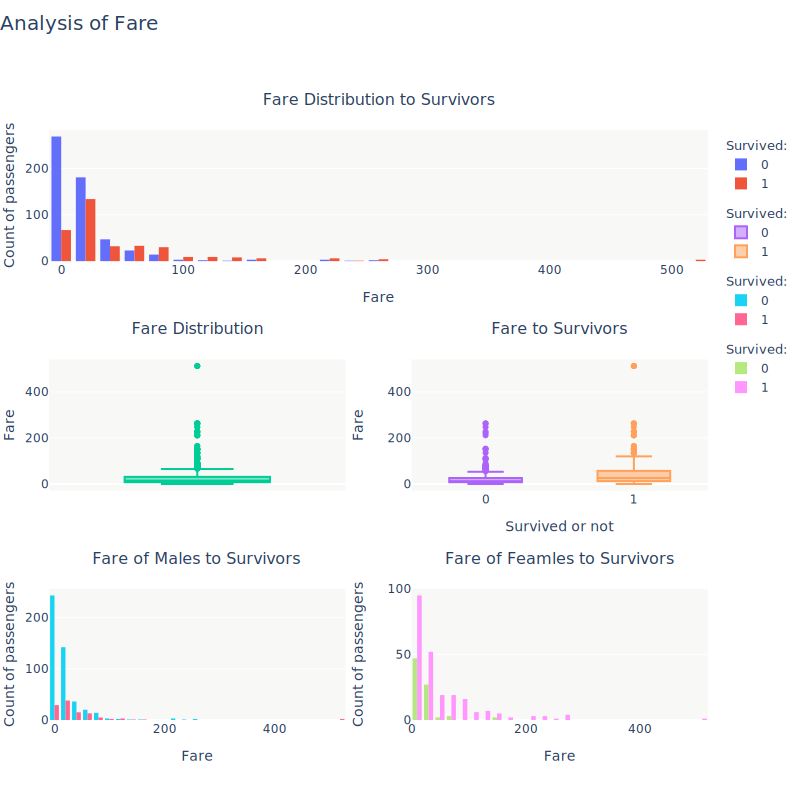

In [6]:
plot_functions.numerical_gender(column="Fare", y_title= "Fare", df=df)

* Nautrally we have a heavily left skewed distribution for fare for all genders. This makes sense, since the population for both 2nd class and 3rd class heavily outweigh first class. 
* There is a massive outlier at fare price $500. We will need to investigate whether this was caused by sample error or if it was a legitimate fare price. 

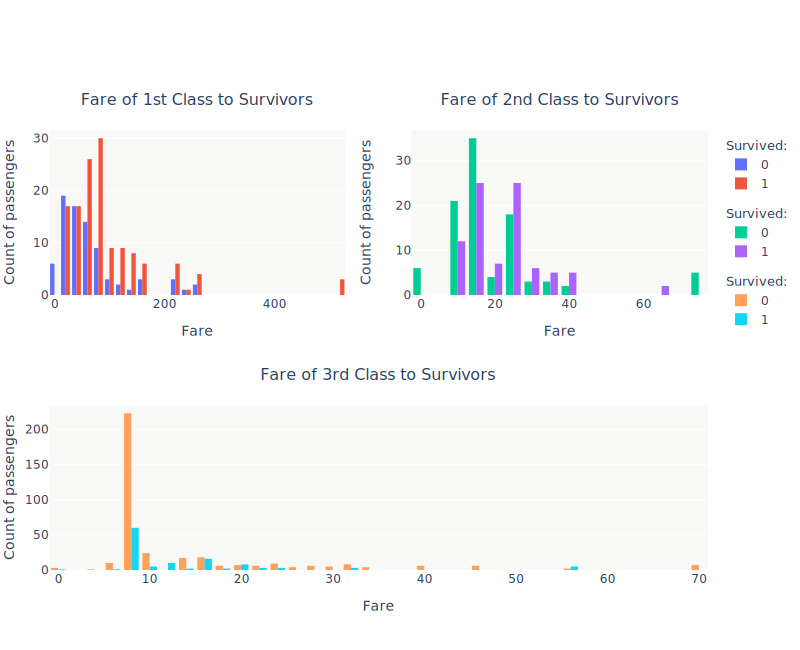

In [7]:
plot_functions.numerical_classes(column="Fare", y_title= "Fare", df=df)

* On average, those passengers with a higher fare price were more likely to survive. 
* Tickets "less than 10 dollars" saw an extremely low survival rate for third class passengers, with up to 200 passengers dying with an $8 ticket fare. 

&nbsp;

### Section B: Data Exploration 
In this section we'll be taking a look at transforming our data to something that can be used to create a predictive model. 

**B.1: Missing Values & Outliers** <br> 
In this section we're going to deal with any missing values and outliers as they can degrade the performance of a machine learning algorithm. 

There is a total of: 866 missing values inside our dataset.


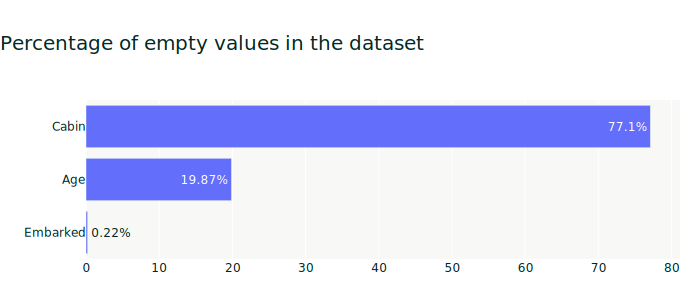

In [8]:
nulls = df.isnull().sum().sum() # Check for missing values.
print(f"There is a total of: {nulls} missing values inside our dataset.")

# Plotting the % share of missing values of each feature. 
plot_functions.empty_values(300, df)

* Features "Age" and "Embarked" have only a small % share of missing values, we can simply impute them, but with almost 70% of the data missing for feature "Cabin", we would have to infer most of its data, which won't be very accurate or informative for our algorithm, so we'll just drop this feature. 

In [9]:
# Dropping feature "Cabin". 
df = df.drop(columns=["Cabin"])

**B.2: Statistical Insights**<br> The next step is to gain insight on our data and learn about its underlying structure, this could be useful in understanding the correlation our features have towards the label.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


* The majority of our dataset seems to be numerical with a few categorical data types that will need to be encoded. 
* As mentioned before, features "Age" and "Embarked" contain some missing values, they will need ton be imputed later on. 

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Our label "Survived" has an average of 0.38 (since this is "less than 0.5" this infers more people are likely to have died), meaning we have an imbalanced dataset, with those who survived being undersampled. 
* The average fare price is 32 dollars with 512 dollars being the highest ticket. 
* The oldest person on board was 80 years old, while the youngest was a few months old. 
* The average age of a passenger was 29 years of age. 

**B.3: Handling Outliers**<br> As mentioned earlier, through our analysis we spotted an extreme outlier for "Fare" at a price point of 500 dollars. With the average only being 32 dollars, we need to investigate wheter this was a sample error. 

In [12]:
# Cross referencing the outliers to passenger names, so we can identify and research. 
df[df["Fare"]>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


* After careful research I found out that 'Mr Thomas Drake Martinez boarded Titanic at Cherbourg with his mother Charlotte Cardeza and his manservant Gustave Lesueur. They occupied one of the two most luxurious suites on board (B51/3/5, ticket 17755, £512, 6s).'
* In conclusion the outliers in question are not sample errors, but just very expensive tickets that occupied the most luxurious suites on the Titanic. So we will not be removing these outliers. 

***Source:*** *https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html*

&nbsp;

### Section C: Feature Engineering 
In this section we'll be taking a look at transforming our data to something that can be used to create a predictive model. 

**C.1: Feature Creation: Age Group**<br>
The next step is to create 2 new features "Age Group" and "Martial Status" derived from our existing feature space. Let's start off by creating our "Age Group" feature.

In [13]:
# We use the efficient numpy vecotorization technqiue for efficient array computation. 
# Setting our conditions.
conditions = [
    (df["Age"] < 18), 
    ((df["Age"] > 17) & (df["Age"] < 36)),
    ((df["Age"] > 35) & (df["Age"] < 56)),
    (df["Age"] > 55)]

# Values if true. 
ifTrue = [
    "child",
    "young adult",
    "middle aged",
    "senior"]

df["Age Group"] = np.select(conditions,ifTrue, "replace_for_nan") # If error occurs, set value as "replace_for_nan".
# Later down the script we will replace "replace_for_nan" with actual NaN values. We'll leave it as a placeholder for now.
df = df.replace("replace_for_nan", np.nan)

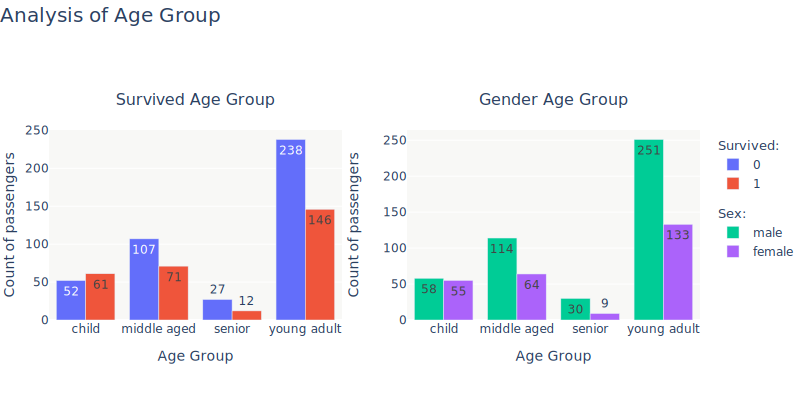

In [14]:
plot_functions.age_group_plot('Age Group', 'Age Group', df)

* We can see that the main demographic of passengers aboard the Titanic were young adults, i.e., those aged between 18-35.
* The second largest demographic were middle aged passengers.
* There were about 110 children onboard the Titanic.
* And lastly, seniors made up around 10% of the total passenger population.

**C.2: Feature Creation: Martial Status**<br>
The next feature we will create is to determine whether or not a passenger is married or not. So there are a few indications that can help us identify the martial status of a passenger:

* The title of the passenger (i.e., the prefix "Mrs." is used to describe any married woman.)
* If SibSp is >=1
* If their age is > legal requirement of marriage.

The first step is to extract the title of a passenger from their "Name" column.

In [15]:
df["Last Name"] = df["Name"].map(lambda x : x.split(",")[0]) # Extracting the last name from passengers. 
df["Name Placeholder"] = df["Name"].map(lambda x : x.split(",")[1]) 
# Placeholder feature to extract passenger title (i.e. "Mrs., Mr., Miss")
df.head(2) # Checking output. 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Last Name,Name Placeholder
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young adult,Braund,Mr. Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,middle aged,Cumings,Mrs. John Bradley (Florence Briggs Thayer)


In [16]:
df["Title"] = df["Name Placeholder"].str.extract(r"([a-zA-Z]+.)") # We want to extract passenger title from "Name_Placeholder".
marriedFemales = df[df["Title"]=="Mrs."] # Creating married women table.  
males = df[df["Title"]=="Mr."] # Creating males with the title 'Mr.' table. 
print("There is a total of %s married females onboard and %s males with the title 'Mr.'" % 
      (marriedFemales["Title"].count(),males["Title"].count()))

There is a total of 125 married females onboard and 517 males with the title 'Mr.'


In [17]:
femaleLastNames = list(marriedFemales["Last Name"]) # Store all female last names into a list. 
# Only keep male last names, that match with any value inside our femaleLastNames list.
filter1 = males["Last Name"].isin(femaleLastNames) 
marriedMales = males[filter1] # Apply filter to create our Married Males table. 
marriedMales = marriedMales[marriedMales["Age Group"]!= "child"] # Dropping children from the rows. 
print("There is a total of %s married males onboard." % (marriedMales["Title"].count()))

There is a total of 59 married males onboard.


* Here we created two tables, a "marriedFemales" of those passengers that match with the title "Mrs." and a "males" table of those passengers that match with the title "Mr.".
* Now we want to filter the male table by any matching last names between the marriedFemales table and male table.
* And then we finally filter out the "child" age group.

In [18]:
married = pd.concat([marriedMales, marriedFemales]) # Creating the total married
marriedIDs = list(married.index) # Storing all married passenger's ID's into a list.

# Creating our "Married" boolean feature. (0=single, 1=married.) 
conditions = [df.index.isin(marriedIDs)] # Setting our conditions.
ifTrue = ["Married"] # Values if true. 
df["Martial Status"] = np.select(conditions,ifTrue, "Not Married")

df = df.drop(columns=(["Name Placeholder", "Title", "Last Name"])) # Removing unnecessary columns. 
df = df.set_index("Name") # Setting passenger names as index. 
df.head(2) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Martial Status
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.2500,S,young adult,Not Married
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599,71.2833,C,middle aged,Married


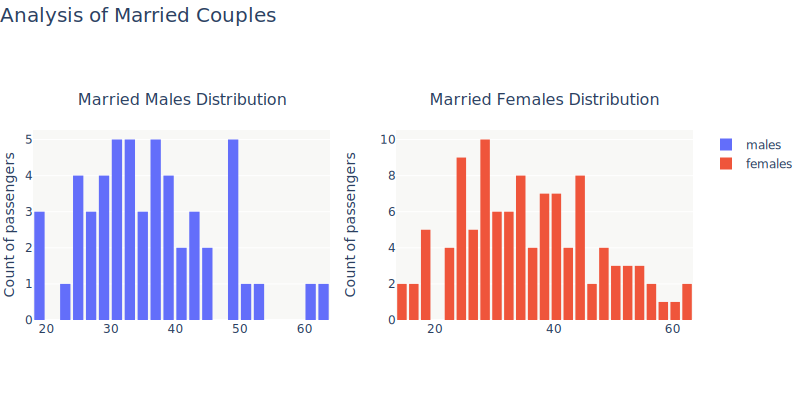

In [19]:
plot_functions.married_distribution(dfMale=marriedMales, dfFemale=marriedFemales)

* Checking the distributions for both married females and male tables we can see they both share a normal distribution.
* This is a promising indicator that we are on the right track, because it displays the age distribution between the two genders are matching, which makes sense, because married couples generally are within the same age group category.

In [20]:
# Rearranging columns so the label is at the end, for easier data splitting.  
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age Group', 'Martial Status', 'Survived']]

df.to_csv(r"train_new_features.csv") # Export processed data. 

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  